In [55]:
import os
import numpy as np
import pandas as pd
import pickle
directory = './data/'

In [56]:
df = []
for f in os.listdir(directory):
    if f[-1]!='p':
        continue
    df.append(pickle.load(open(directory+f,'rb')))
df = pd.concat(df).reset_index(drop=True)

(10001, 7)


<IPython.core.display.Javascript object>


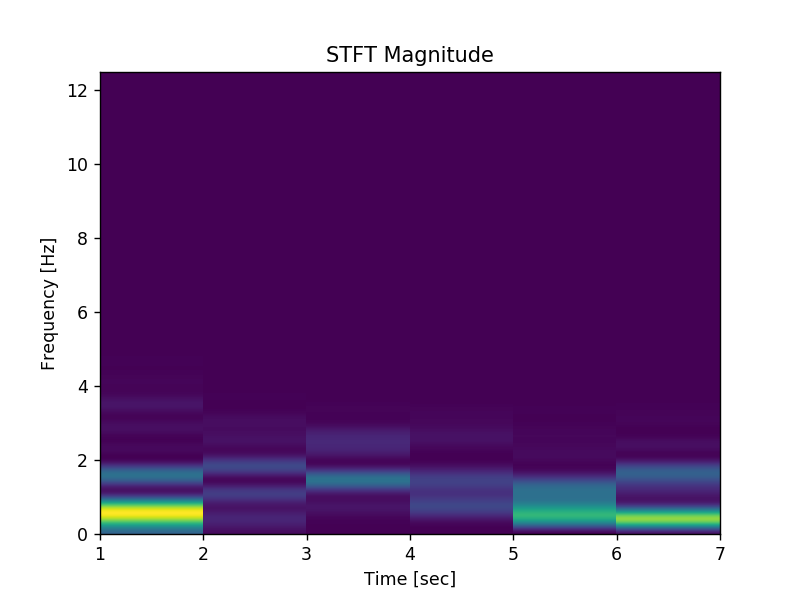

(10001, 7)


<IPython.core.display.Javascript object>


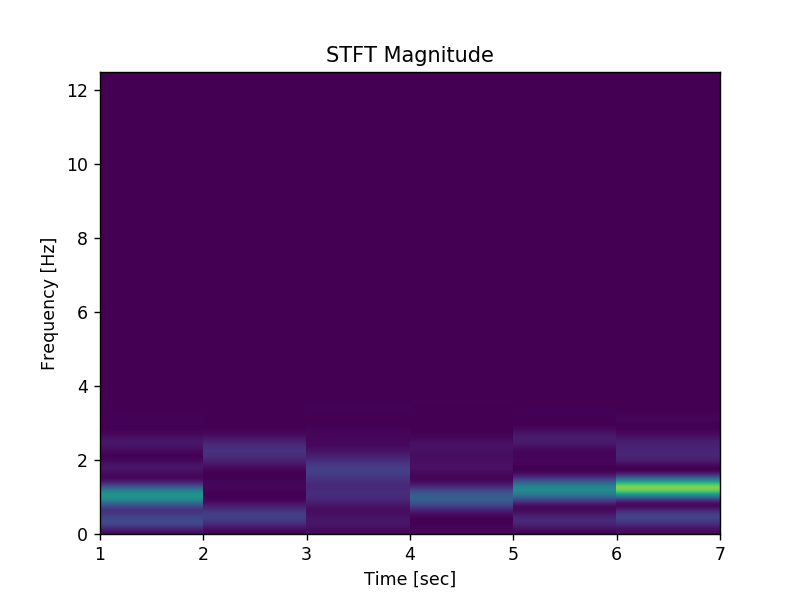

(10001, 7)


<IPython.core.display.Javascript object>


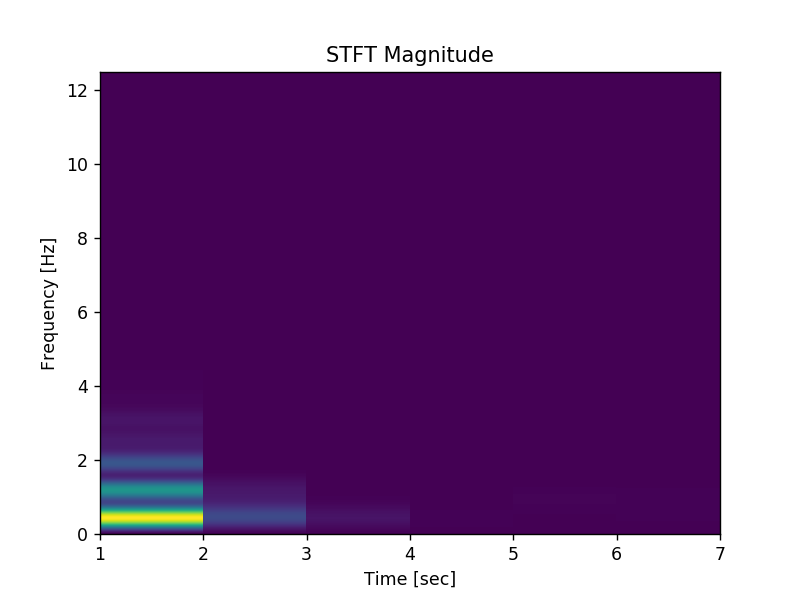

(10001, 7)


<IPython.core.display.Javascript object>


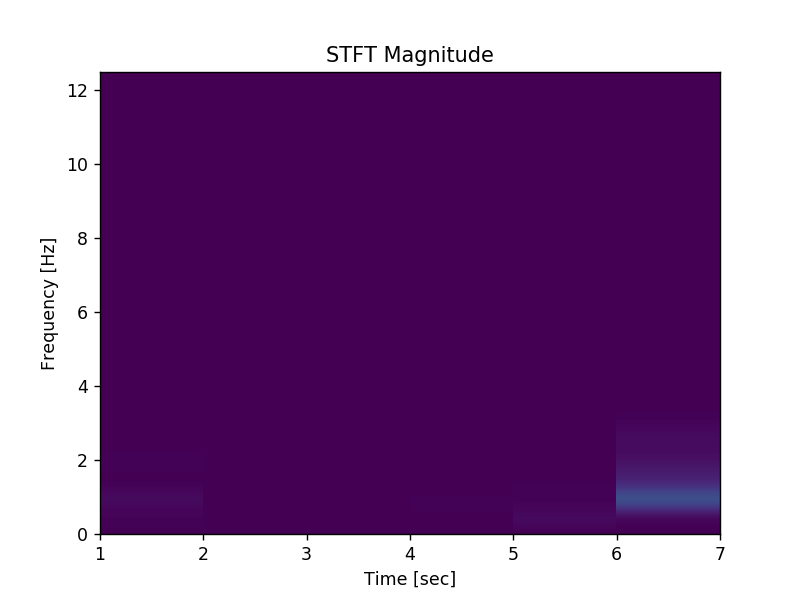

(10001, 7)


<IPython.core.display.Javascript object>


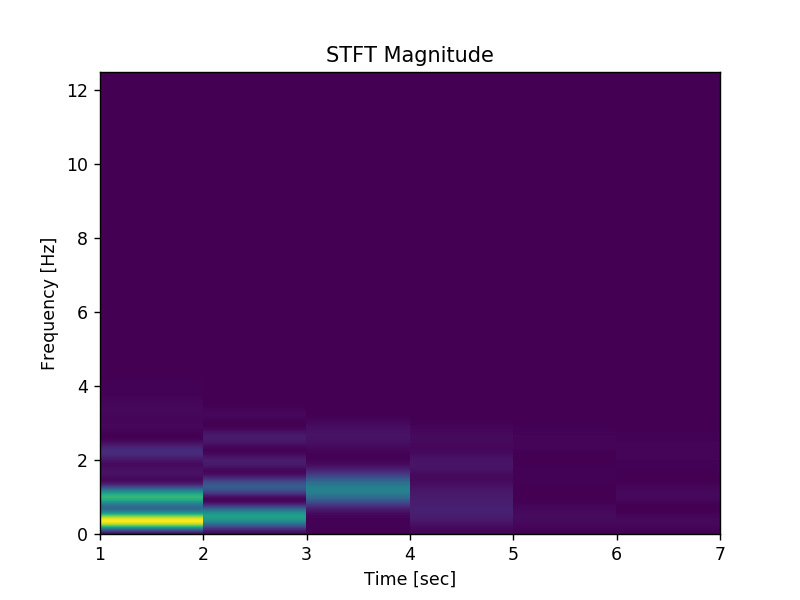

(10001, 7)


<IPython.core.display.Javascript object>


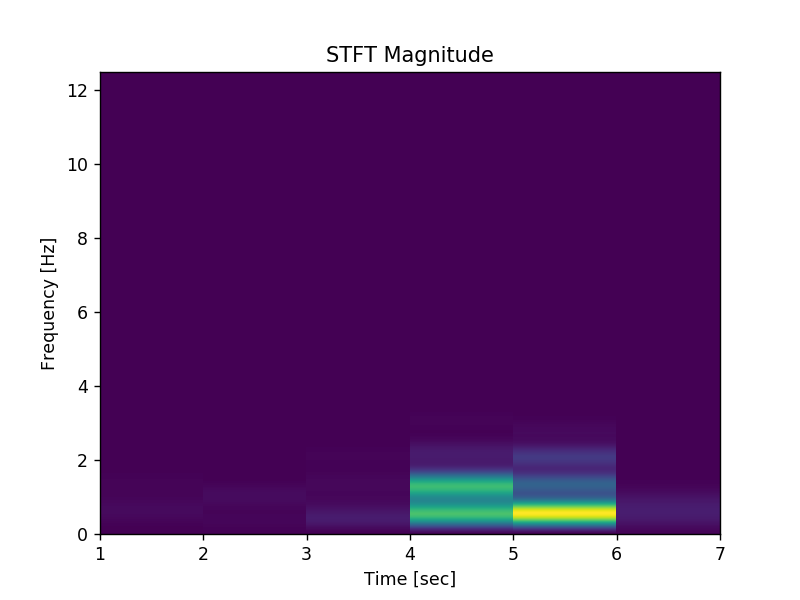

In [94]:
# df.columns
%matplotlib notebook
from scipy import signal
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
def interpolate_window(window):
    window = window[window[:,0].argsort()]
    ts = np.linspace(window[0,0],window[-1,0],200)
    f = interp1d(window[:,0],window[:,1:],axis=0,fill_value='extrapolate',kind='linear')
    window_interpolate = f(ts)
    window_final = np.concatenate([ts.reshape(-1,1),window_interpolate],axis=1)
    return window_final

def parse_windows(window):
    window = np.array([np.array(a) for a in window])
    window = window[window[:,0].argsort()]
    return interpolate_window(window)

def preProcessing(X1,Fs=25,fil_type='ppg'):
    X1 = signal.detrend(X1,axis=0,type='constant')
    b = signal.firls(65,np.array([0,0.2, 0.3, 3 ,3.5,Fs/2]),np.array([0, 0 ,1 ,1 ,0, 0]),
                     np.array([100*0.02,0.02,0.02]),fs=Fs)
    X2 = np.zeros((np.shape(X1)[0],X1.shape[1]))
    for i in range(X2.shape[1]):
        X2[:,i] = signal.convolve(X1[:,i],b,mode='same')
    return X2

output_columns = ['respiration','inspiration','expiration','stretch','ieratio']
input_columns = ['input_left','input_right']
for i,row in df.iterrows():
    if i>5:
        continue
    window = parse_windows(row['input_right'])
    window[:,1:4] = preProcessing(window[:,1:4])
#     print(window.shape,i)
#     plt.figure()
#     plt.plot(window[:,0]-window[0,0],window[:,1])
#     plt.show()
    f, t, Zxx = signal.spectrogram(window[:,2], 25,nperseg=50,nfft=20000,noverlap=25,axis=0)
    print(Zxx.shape)
    plt.figure()
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.max(np.abs(Zxx)))
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    

<IPython.core.display.Javascript object>


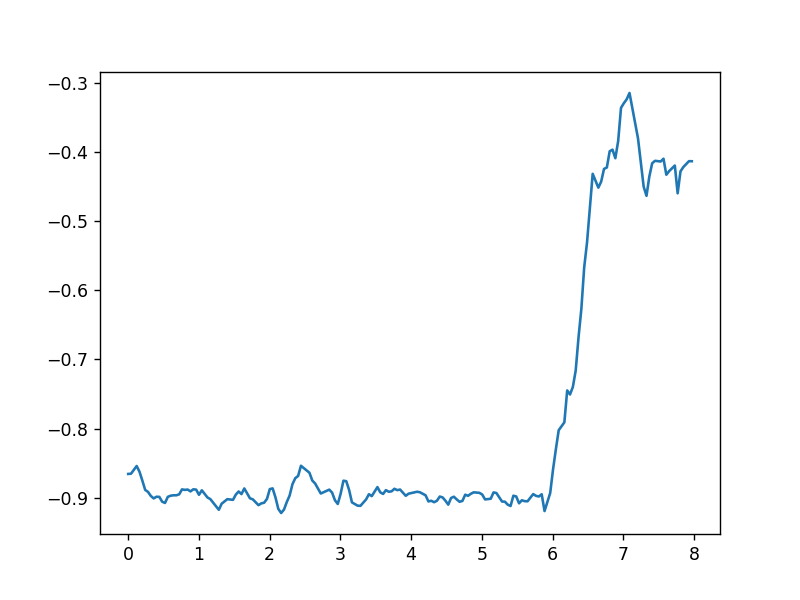

In [41]:
%matplotlib notebook
plt.plot(window[:,0]-window[0,0],window[:,4])